<a href="https://colab.research.google.com/github/OnePassio/CE888/blob/master/Lab7/Lab7_Exercise4_flower_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flowers Recognition from Kaggle
This dataset contains labeled 4242 images of flowers.
##API
kaggle datasets download -d alxmamaev/flowers-recognition

#download the database

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "thomastran89" # username from the json file
os.environ['KAGGLE_KEY'] = "29b93919c31aa2997218d05bc048f093" # key from the json file
!kaggle datasets download -d alxmamaev/flowers-recognition

100% 449M/450M [00:05<00:00, 119MB/s] 
100% 450M/450M [00:05<00:00, 80.7MB/s]


In [2]:
!ls

 flowers-recognition.zip  'mytest'$'\001''.jpg'   sample_data


# Unzip data into 'contents' folder

In [0]:
!unzip flowers-recognition.zip

In [4]:
!ls flowers

daisy  dandelion  flowers  rose  sunflower  tulip


## Build test Model for test sunflower & tulip only
dog = tulip
sunflower= cat

In [0]:
base_dir = 'contents'
os.mkdir(base_dir)

In [0]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_sunflower_dir = os.path.join(train_dir, 'sunflower')
os.mkdir(train_sunflower_dir)
validation_sunflower_dir = os.path.join(validation_dir, 'sunflower')
os.mkdir(validation_sunflower_dir)
test_sunflower_dir = os.path.join(test_dir, 'sunflower')
os.mkdir(test_sunflower_dir)

train_tulip_dir = os.path.join(train_dir, 'tulip')
os.mkdir(train_tulip_dir)
validation_tulip_dir = os.path.join(validation_dir, 'tulip')
os.mkdir(validation_tulip_dir)
test_tulip_dir = os.path.join(test_dir, 'tulip')
os.mkdir(test_tulip_dir)

In [7]:
!ls contents/train

sunflower  tulip


In [8]:
test_sunflower_dir

'contents/test/sunflower'

## Copy Data from dataset to model data folder

In [9]:
from os import listdir
from os.path import isfile, join

path_org_sunflower="flowers/sunflower"
path_org_tulip="flowers/tulip"

sunflower_filenames = [f for f in listdir(path_org_sunflower) if isfile(join(path_org_sunflower, f))]
tulip_filenames = [f for f in listdir(path_org_tulip) if isfile(join(path_org_tulip, f))]

print("Total sunflower image files is:{}".format(len(sunflower_filenames)))
print("Total Tulip image files is:{}".format(len(tulip_filenames)))
#print(tulip_filenames)

Total sunflower image files is:734
Total Tulip image files is:984


## Create Data set for train, validate & test (500-100-100)

In [0]:
import shutil
# for sunflower dataset
# sunflower dataset train data
fnames = [sunflower_filenames[i] for i in range(0,500)]
for fname in fnames:
    src = os.path.join(path_org_sunflower, fname)
    dst = os.path.join(train_sunflower_dir, fname)
    shutil.copyfile(src, dst)
# sunflower dataset validate data
fnames = [sunflower_filenames[i] for i in range(500,600)]
for fname in fnames:
    src = os.path.join(path_org_sunflower, fname)
    dst = os.path.join(validation_sunflower_dir, fname)
    shutil.copyfile(src, dst)
# sunflower dataset test data
fnames = [sunflower_filenames[i] for i in range(600,700)]
for fname in fnames:
    src = os.path.join(path_org_sunflower, fname)
    dst = os.path.join(test_sunflower_dir, fname)
    shutil.copyfile(src, dst)

# for tulip dataset
# tulip dataset train data
fnames = [tulip_filenames[i] for i in range(0,500)]
for fname in fnames:
    src = os.path.join(path_org_tulip, fname)
    dst = os.path.join(train_tulip_dir, fname)
    shutil.copyfile(src, dst)
# tulip dataset validate data
fnames = [tulip_filenames[i] for i in range(500,600)]
for fname in fnames:
    src = os.path.join(path_org_tulip, fname)
    dst = os.path.join(validation_tulip_dir, fname)
    shutil.copyfile(src, dst)
# tulip dataset test data
fnames = [tulip_filenames[i] for i in range(600,700)]
for fname in fnames:
    src = os.path.join(path_org_tulip, fname)
    dst = os.path.join(test_tulip_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
#test folder have files
print('total training sunflower images:', len(os.listdir(train_sunflower_dir)))
print('total validation sunflower images:', len(os.listdir(validation_sunflower_dir)))
print('total test sunflower images:', len(os.listdir(test_sunflower_dir)))


print('total train tulip images:', len(os.listdir(train_tulip_dir)))
print('total validation tulip images:', len(os.listdir(validation_tulip_dir)))
print('total test tulip images:', len(os.listdir(test_tulip_dir)))

total training sunflower images: 500
total validation sunflower images: 100
total test sunflower images: 100
total train tulip images: 500
total validation tulip images: 100
total test tulip images: 100


## Using ImageDataGenerator to read images from directories
As you know by now, data should be formatted into appropriately preprocessed floatingpoint tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows:

* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Convert these into floating-point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but fortunately Keras has utilities to take care of these steps automatically. Keras has a module with image-processing helper tools, located at keras.preprocessing.image. In particular, it contains the class ImageDataGenerator,which lets you quickly set up Python generators that can automatically turn image files on disk into batches of preprocessed tensors.

#Convolutional Networks with Dropout

Ref: https://github.com/mneha4/Training-Neural-Nets---Guidelines

In [0]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))# 2 layer output is sunflower and tulip

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [33]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='categorical')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Epoch 1/20
100/100 [==============================] - 28s 276ms/step - loss: 0.4334 - acc: 0.7984 - val_loss: 0.3638 - val_acc: 0.8547
Epoch 2/20
100/100 [==============================] - 25s 250ms/step - loss: 0.3783 - acc: 0.8359 - val_loss: 0.3354 - val_acc: 0.8554
Epoch 3/20
100/100 [==============================] - 25s 251ms/step - loss: 0.3604 - acc: 0.8356 - val_loss: 0.3069 - val_acc: 0.8638
Epoch 4/20
100/100 [==============================] - 25s 252ms/step - loss: 0.3187 - acc: 0.8656 - val_loss: 0.2758 - val_acc: 0.8883
Epoch 5/20
100/100 [==============================] - 25s 250ms/step - loss: 0.3151 - acc: 0.8644 - val_loss: 0.2780 - val_acc: 0.8813
Epoch 6/20
100/100 [==============================] - 25s 248ms/step - loss: 0.2928 - acc: 0.8691 - val_loss: 0.2479 - val_acc: 0.9078
Epoch 7/20
100/100 [==============================] - 25s 251ms/step - loss: 0.2858 - acc: 0.8741 - val_los

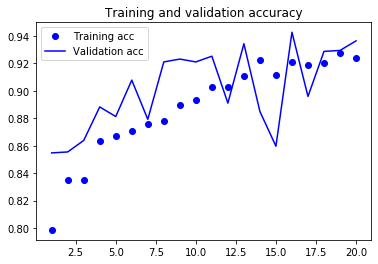

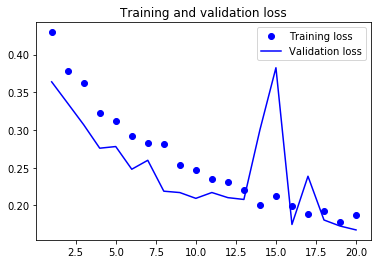

In [34]:
model.save('flowers.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Show a test case with graphics

In [0]:
from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64

def img_to_display(filename):
    # inspired on this kernel:
    # https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe
    # credits to stassl :)
    
    i = Image.open(filename)
    i.thumbnail((200, 200), Image.LANCZOS)
    
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    

def display_result(filename, prediction, target):
    '''
    Display the results in HTML
    
    '''

    type_image = 'Unknown'
    
    if(prediction[0]>prediction[1] and prediction[0]>0.5):
        type_image = 'Sunflower'
    elif(prediction[0]<prediction[1] and prediction[1]>0.5):
        type_image = 'Tulip'
    
            
    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 620px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <h3 style="margin-left: 50px; margin-top: 2px;">Predict is: {}</h3>
            <p style="margin-left: 50px; margin-top: 5px; font-size: 16px">Real Target: {}</p>
            <p style="margin-left: 50px; margin-top:  10px; font-size: 16px">probability of Sunflower:{}</p>
            <p style="margin-left: 50px; margin-top: 15px; font-size: 16px">probability of Tulip:{}</p>
            <p style="margin-left: 50px; margin-top: 19px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , type_image
               , "{0:.2f}%".format(prediction[0]*100,2)
               , "{0:.2f}%".format(prediction[1]*100,2)
               , target
               , filename
               )

    display(HTML(display_html))

In [143]:
import random
import numpy as np


data_test=[];
real_result=[];

#add flower
for i in range(3):
  filename=random.choice(os.listdir(test_sunflower_dir));
  src=os.path.join(test_sunflower_dir,filename);
  data_test.append(src)
  real_result.append("Sunflower")
  #add
  filename=random.choice(os.listdir(test_tulip_dir));
  src=os.path.join(test_tulip_dir,filename);
  data_test.append(src)
  real_result.append("Tulip")

filename=random.choice(os.listdir("flowers/daisy"));
src=os.path.join("flowers/daisy",filename);
data_test.append(src)
real_result.append("Daisy")

data_test

['contents/test/sunflower/3568114325_d6b1363497.jpg',
 'contents/test/tulip/14233348826_89949b4784_n.jpg',
 'contents/test/sunflower/5037531593_e2daf4c7f1.jpg',
 'contents/test/tulip/8838347159_746d14e6c1_m.jpg',
 'contents/test/sunflower/21984860006_20dfacea1c_m.jpg',
 'contents/test/tulip/12883412424_cb5086b43f_n.jpg',
 'flowers/daisy/495098110_3a4bb30042_n.jpg']

In [0]:
#mytest_datagen = ImageDataGenerator(rescale=1./255)
#mytest_generator = test_datagen.flow_from_directory(test_dir,
#                                                        target_size=(150, 150),
#                                                        batch_size=10000,
#                                                        class_mode='binary')
#mytest_generator.reset()
#pred=model.predict_generator(mytest_generator,steps=1,verbose=1)
#predicted_class_indices=np.argmax(pred,axis=1)
#print(len(pred))
#pred



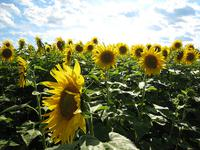


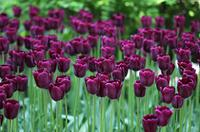


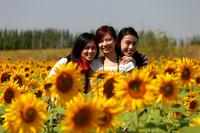


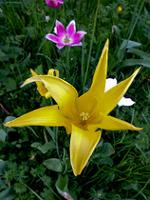


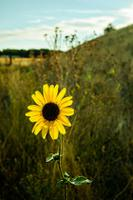


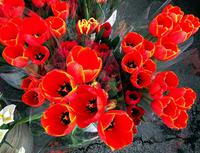


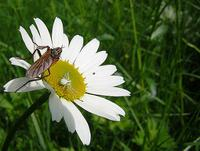

In [144]:
import numpy as np
from keras.preprocessing import image

for i in range(len(data_test)):
  test_file=data_test[i]
  #print(test_file)
  img_width, img_height = 150, 150
  img = image.load_img(test_file, target_size = (img_width, img_height))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  predict=model.predict(img)
  #print(predict)
  #print("{},{}".format(predict[0][0],predict[0][1]))
  display_result(test_file, predict[0], real_result[i])
  